In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

Importing the dataset

In [41]:
df=pd.read_csv('Iris.csv')

Checking the datatypes of the data in the dataset

In [42]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [43]:
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking the number of rows and columns in the dataset

In [44]:
df.shape  

(150, 6)

Checking if the dataset contains the any null values or not

In [45]:
df.isnull().sum()  

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Getting the information of the data 

In [46]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Dropping the column 'Id'

In [47]:
df.drop('Id',inplace=True,axis=1) 

Getting the description of the data

In [48]:
df.describe()  

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Determining the mean and median of the different species present in the data set 

In [49]:
df.groupby('Species').agg(['mean', 'median'])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

In [50]:
df.groupby('Species').std()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


 Plotting the box-plots using Seaborn library 

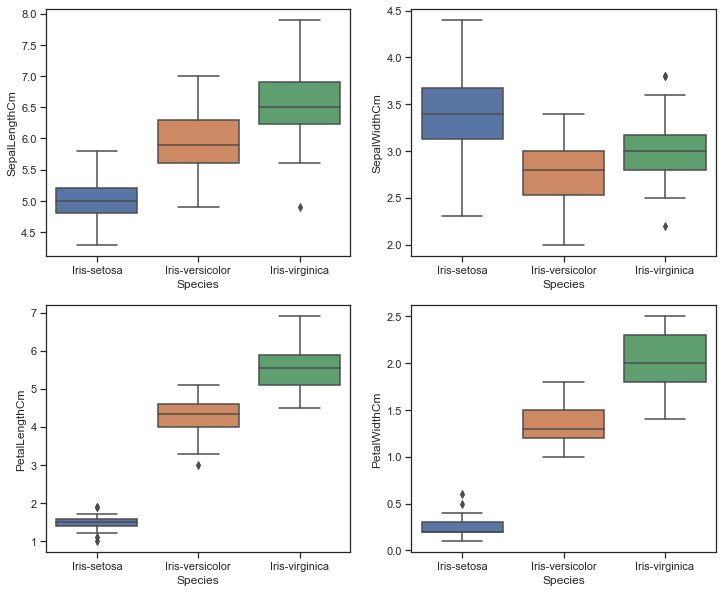

In [51]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.show()

The isolated points that can be seen in the box-plots above are the outliers in the data. Since these are very few in number, it wouldn't have any significant impact on our analysis.

Plotting Violin plots

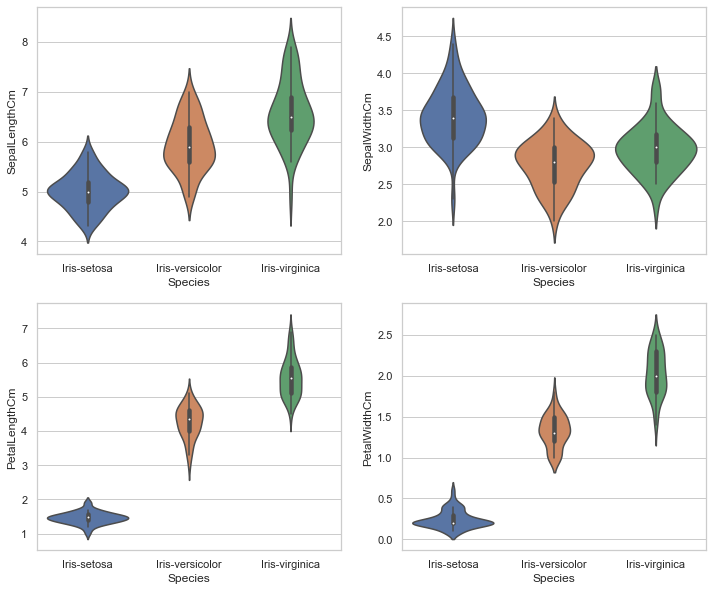

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.show()

Violin plots typically are more informative as compared to the box plots as violin plots also represent the underlying distribution of the data in addition to the statistical summary.

Plotting the Histogram & PDF using Seaborn FacetGrid object


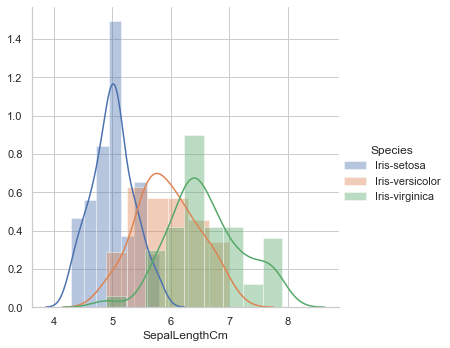

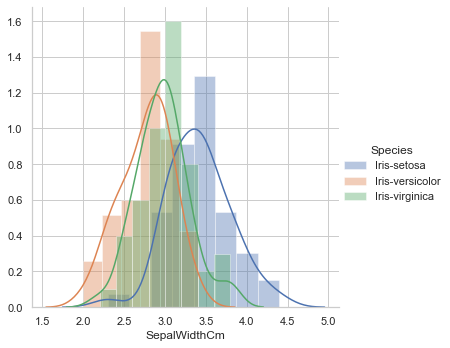

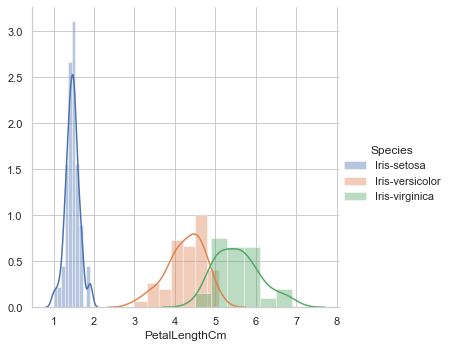

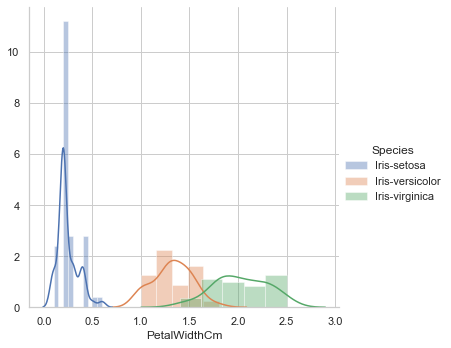

In [53]:
# sepal length
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
# sepal width
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
# petal length
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
# petal width
sns.FacetGrid(df, hue="Species", height=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show()

Once imports are complete, we may define a few parameters for later use...

In [69]:
class_count = 3
plot_colors = 'brg'
markers = 'ovs'
plot_res = 0.01

In [59]:
from sklearn.datasets import load_iris

In [60]:
iris=load_iris()

Applying the decision tree model in a pairwise fashion to the available features to see some simple applications of how decision trees can assign classifications to individual samples

(0.5, 7.390000000000006, -0.4, 2.9900000000000033)

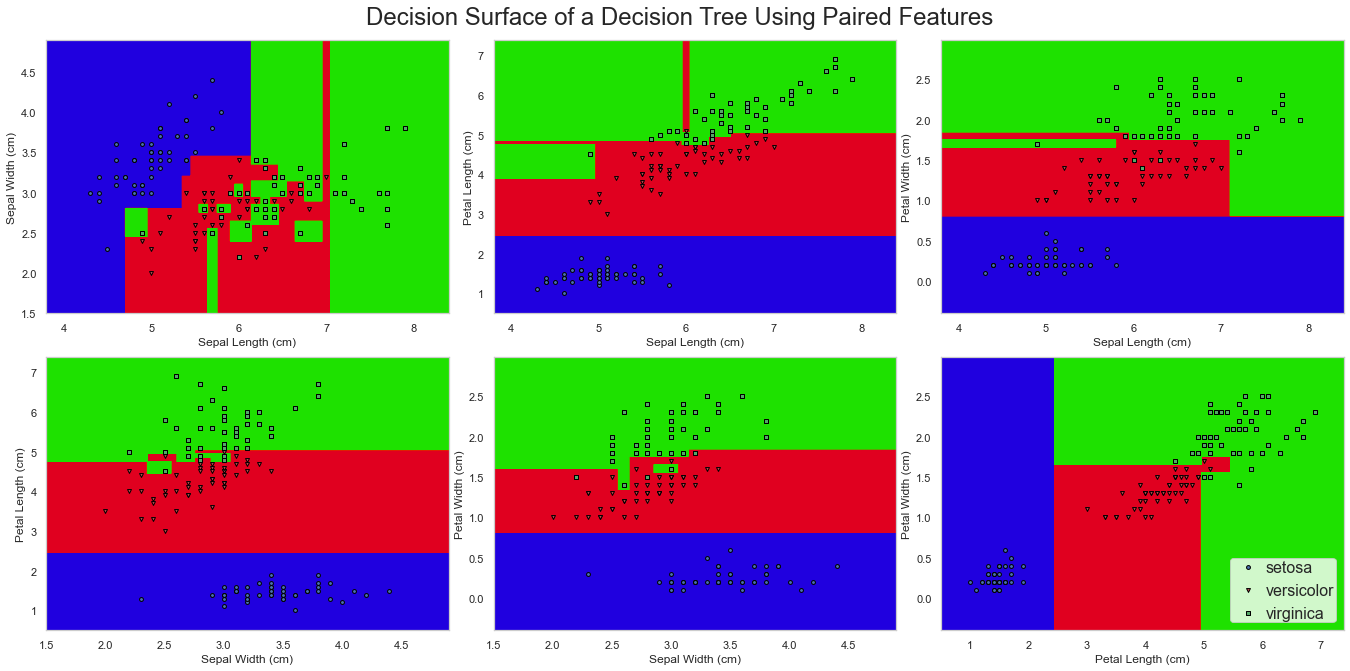

In [70]:
plt.figure(figsize=(20,10))
models = []
for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                           [1, 2], [1, 3], 
                                                   [2, 3] ]):
    X, y = iris.data[:, pair] , iris.target
    model = DecisionTreeClassifier().fit(X, y)
    models.append(model)
    plt.subplot(2, 3, pair_index + 1)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, 
                                   x_max, 
                                   plot_res),
                         np.arange(y_min, 
                                   y_max, 
                                   plot_res) )
    plt.tight_layout(h_pad = 0.5, 
                     w_pad = 0.5, 
                       pad = 4.0 )
    Z = model.predict(np.c_[xx.ravel(), 
                            yy.ravel() ])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
    plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])
    for i, color, marker in zip(range(class_count), plot_colors, markers):
        index = np.where(y == i)
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    c = color,
                    marker = marker,
                    label = iris.target_names[i],
                    cmap = plt.cm.brg, 
                    edgecolor = 'black', 
                    s = 15                       )
plt.suptitle('Decision Surface of a Decision Tree Using Paired Features',
             size = 24                                                   )
plt.legend(loc = 'lower right',
           fontsize = 16,
           borderpad = 0.1, 
           handletextpad = 0.1 )
plt.axis("tight")

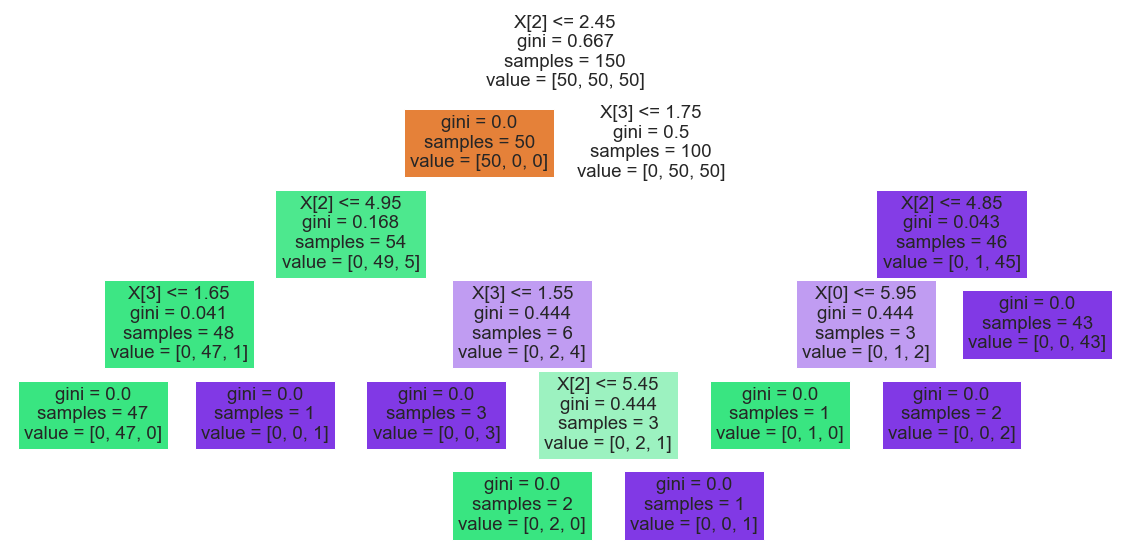

In [66]:
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)
plt.figure(figsize = (20,10))
plot_tree(model_all_params, 
          filled=True      )
plt.show()

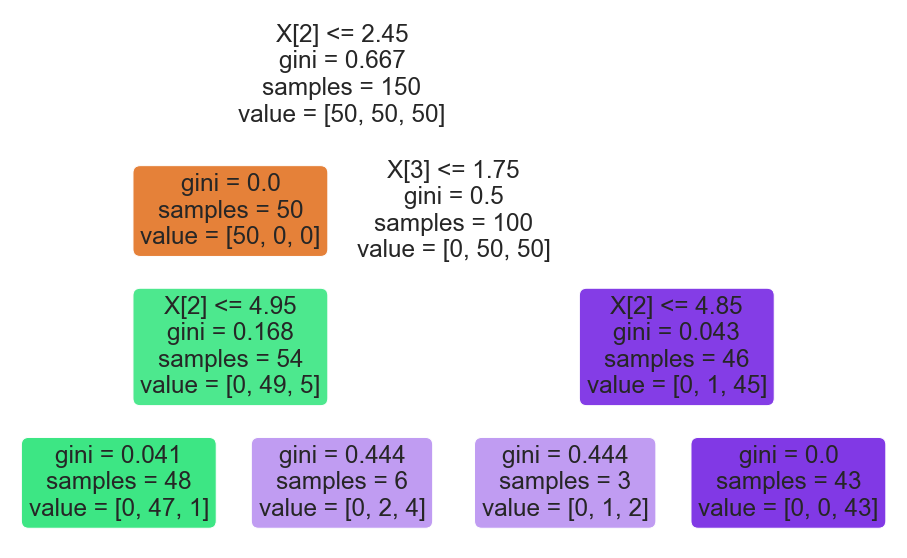

In [67]:
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(iris.data, iris.target)
plt.figure(figsize = (16,10))
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True                )
plt.show()